# Purpose of Pymaceuticals Analysis #
The purpose of this analysis of Pymaceuticals research data is to determine the effectiveness of their drug, Capomulin, on tumor development in cancer patients. To do so, they have conducted a study on 249 mice with squamous cell carcinoma over a 45 day observation period. The mice were given different drug treatments and the size of the tumor was measured at various timepoints. All mice had a starting tumor volume of 45mm.

# Tools #
Libraries used:
    Pandas
    Matplotlib
    Scipy
    Numpy
    
# Pymaceuticals Data Cleansing #
Two datasets consisting of observation results and mouse data were imported and read as CSV files. The two files were merged; value_count and .loc was performed on Mouse ID and Timepoint to identify duplicate records. The mouse and all its related records were dropped, resulting in 248 unique mouse IDs that we analyzed.

# Analysis #

The following tables and graphs were created to assist in this analysis:

## Summary Statisitcs (All Drugs) ##
In the summary statistics table listed by the tested Drug Regimen, we can see that the drugs Capomulin and Ramicane are the only two drugs where the mean tumor volumes decreased to 40.7mm and 40.2mm respectively from the original 45mm starting volume. Across the board of statistics (mean, median, variance, standard deviation, and standard error), Ramicane seems to perform slightly better since the tumor volumes reduced more than Capomulin when looking at the mean and median volumes over the timepoints. Tumor volumes on Ramicane have slightly less variability, with lower variance, standard deviation, and standard error values than Capomulin.

## Bar Chart (All Drugs) ##
Pandas was used to create a data frame listing number of mice per Drug Regimen and bar charts plotted on the data using both Pandas and Pyplot. The data shows that there were more mice given then Capomulin and Ramicane than all other drug regimens.  There were 230 and 228 mice on Capomulin and Ramicane treatments respectively whereas other drugs had 148-188 mice. More investigation would be needed to see if this could be skewing the favorable results of Capomulin and Ramican drug regimens. More sample datapoints would provide a better representation of the population and less variability, which we saw of Capomulin and Ramican compared to the rest of the drug regimens. 

## Pie Chart (Male vs. Female) ##
Pandas was used to create a series that displayed number of mice in each sex and plotted as pie charts using both Pandas and Pyplot. The pie chart shows that the mice sample is pretty even between female and male sexes, which would be a good representation of overall population if the drugs were to be used on huamns.

## Boxplot (Capomulin, Ramicane, Infubinol, Ceftamin) ##
We want to focus on 4 drug regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. To identify the final volume of the tumors under these 4 treatments, Pandas was used to find the max (latest) observed timepoint for each mouse and locate (.loc and for loop) the tumor volumes at that time point for each drug regimen. 

Pandas was then used to calculate the quartiles, which in turn was used to calculate the IQR and set the lower bound/higher bounds so we can determine the outliers of each drug. The only outlier found in tumor volumes was for Infubinol, which had 1 outlier of 36.83mm. 

Using Pyplot, we ploted a box and whiskers graph to show the much lower tumor masses of mice on Capomulin and Ramicane after treatment vs. mice who were on Infubinol and Ceftamin treatments. In this view where we only focus on the data for the last timepoint, the tumor volumes for Capomulin have less variability than the tumor volumes for Ramicane whereas it was the opposite when looking at all timepoints. 

## Line, Scatter, and Regression (Capomulin Only) ##
### Line ###
A line graph was plotted using Pandas to show the tumor volume decrease over the 45 day timepoint during the Capomulin drug regiment treatment for mouse l509. The line shows an initial increase of tumor volume for the first 20 days of treatment followed by a drastic decrease for 15 days after the initial increase (with a short increase before day 30) and another uptick at around day 35 of the treatment. This indicates that the drug may have a timing component of when it would affect the tumor development. More data would be needed to see if the medication is time released. 

### Scatter and Regression ###
Pyplot was used to plot a scatter plot and regression line using linregress function from scipy library between mcie weight and final avg. tumor volume of mice on Capomulin. The datapoints on the scatter plot is tightly clustered around the regression line and the linregress function returned a coefficient of 0.84, which indicates a high positive correlation between the weight of the mouse and average tumor volume at the final observed timepoint. This could mean that Capomulin is less effective on heavier mice. 

## Conclusion ##
Capomulin and Ramicane drug treatments both drastically decrease tumor volumes over the observed timepoints with Capomulin having lower variability at the last timepoint. THese two drug treatments performed the best out of all observed treatments. A few considerations for future research: 
- observing equal amounts of mice for all drugs since the larger sample sizes for Capomulin and Ramicane could have skewed the results.
- more information about time release of each drug regimen to decrease bias around which timepoint we select data to compare the drug regimen. As we saw in the line graph for 1 mouse under Capomulin treatment, there were time intervals at which the drug was decreasing the tumor volume and when the volume seemed to increase. We should take care not to compare drug regimens at the same timepoints if their time release are at different points.
- weight of the mice had high correlation to the tumor volume. As such, more research should be done on the impact of weight and drug effectiveness like sampling more mice of the same weight group and conducting further tests of the desired drug treatment.




In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_merged_df = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "left")

# Display the data table for preview
mouse_merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mouse_count = mouse_merged_df["Mouse ID"].nunique()
mouse_count

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#check count of occurrences for each mouse ID and Timepoint
duplicate_check = mouse_merged_df[["Mouse ID", "Timepoint"]].value_counts()
duplicate_check

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
                      ..
i334      20           1
          15           1
          10           1
          5            1
z969      45           1
Name: count, Length: 1888, dtype: int64

In [5]:
#use .loc to identify ocurrences of greater than 1 for Mouse ID and Timepoint
duplicated_mouse = duplicate_check.loc[duplicate_check > 1]
duplicated_mouse_df = pd.DataFrame(duplicated_mouse)
duplicated_mouse_df.index

MultiIndex([('g989', 20),
            ('g989', 15),
            ('g989', 10),
            ('g989',  5),
            ('g989',  0)],
           names=['Mouse ID', 'Timepoint'])

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_g989_only = mouse_merged_df.loc[mouse_merged_df["Mouse ID"].isin(duplicated_mouse_df.index.get_level_values("Mouse ID")) 
                                      == True]
mouse_g989_only

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. Note: and Timepoint
mouse_unique_df = mouse_merged_df.loc[mouse_merged_df["Mouse ID"].isin(duplicated_mouse_df.index.get_level_values("Mouse ID")) 
                                      == False]
# preview new clean DataFrame after dropping the duplicate mouse by its ID.
mouse_unique_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
mouse_unique_df["Mouse ID"].nunique()
#mouse_unique_df.to_csv("check_mouse_file.csv")

248

## Summary Statistics

In [53]:
#additional view to see tumor volume at 0 timepoint
drug_regimen = mouse_unique_df["Drug Regimen"].drop_duplicates()
drug_regimen_df = pd.DataFrame(drug_regimen)
drug_regimen_df.reset_index(drop = True)
tumor_start_vol = []
for drug in drug_regimen_df["Drug Regimen"]:
    tumor_start = mouse_unique_df.loc[(mouse_unique_df["Drug Regimen"] == drug) &
                                      (mouse_unique_df["Timepoint"] == 0),
                                       "Tumor Volume (mm3)"]
    tumor_start_vol.append(tumor_start)
#tumor_start_vol

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_mouse = mouse_unique_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_mouse = mouse_unique_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_mouse = mouse_unique_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_mouse = mouse_unique_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_mouse = mouse_unique_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
stats_keys = {"Mean Tumor Volume": mean_mouse,
              "Median Tumor Volume": median_mouse,
              "Tumor Volume Variance": variance_mouse,
              "Tumor Volume Std. Devl.": std_mouse,
              "Tumor Volume Std. Err.": sem_mouse}
summary_df = pd.DataFrame(stats_keys)
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Devl.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
#using Scipi
numpy_mean = np.mean(mouse_unique_df["Tumor Volume (mm3)"])
numpy_median = np.median(mouse_unique_df["Tumor Volume (mm3)"])
numpy_var = np.var(mouse_unique_df["Tumor Volume (mm3)"])
numpy_std = np.std(mouse_unique_df["Tumor Volume (mm3)"])
numpy_sem = st.sem(mouse_unique_df["Tumor Volume (mm3)"])
# Using the aggregation method, produce the same summary statistics in a single line
numpy_sum = mouse_unique_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([np.mean, np.median, np.var, np.std, st.sem])
numpy_sum 

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [11]:
#Generate series to plot bar chart
drugs_mouse = mouse_unique_df.groupby("Drug Regimen")["Mouse ID"].size().sort_values(ascending= False)
drugs_mouse_df = pd.DataFrame(drugs_mouse)
drugs_mouse_df

,Mouse ID
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


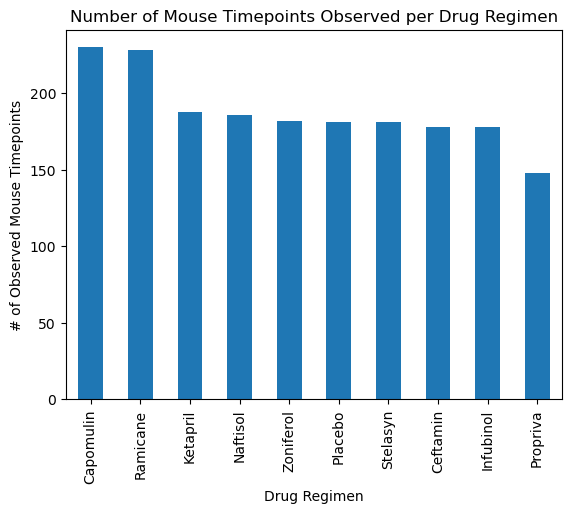

In [132]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drugs_mouse.plot(kind = "bar", ylabel = "# of Observed Mouse Timepoints", title = "Number of Mouse Timepoints Observed per Drug Regimen")
plt.title("Number of Mouse Timepoints Observed per Drug Regimen")
plt.show()

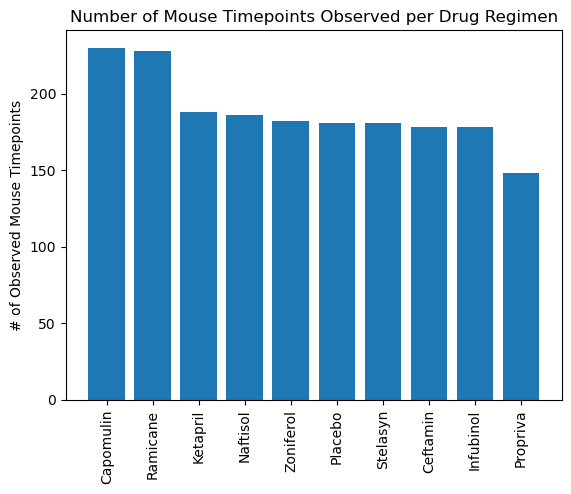

In [130]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(x=drugs_mouse_df.index.get_level_values(0),height = drugs_mouse_df["Mouse ID"], align = "center")
plt.xticks(rotation = "vertical")
plt.ylabel("# of Observed Mouse Timepoints") 
plt.title("Number of Mouse Timepoints Observed per Drug Regimen")
plt.show()

In [13]:
#Look at data for pie plot
gender = mouse_unique_df["Sex"].value_counts()
gender

Sex
Male      958
Female    922
Name: count, dtype: int64

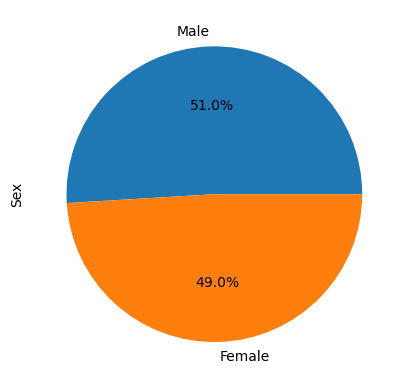

In [133]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
labels = ["Male","Female"]
gender.plot(kind = "pie", labels=labels, autopct = "%1.1f%%", ylabel = "Sex")
plt.show()

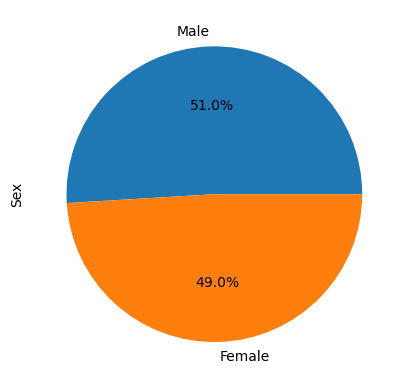

In [139]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(x = mouse_unique_df["Sex"].value_counts(), labels = labels, autopct = "%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = mouse_unique_df.groupby(["Drug Regimen", "Mouse ID"])["Timepoint"].max()
timepoint_df = pd.DataFrame(last_timepoint)
timepoint_df.reset_index
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(timepoint_df,mouse_unique_df, on = ["Mouse ID", "Timepoint", "Drug Regimen"], how = "left")
merged_df.reset_index(drop = True)
merged_df

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,b128,45,Capomulin,38.982878,2,Female,9,22
1,b742,45,Capomulin,38.939633,0,Male,7,21
2,f966,20,Capomulin,30.485985,0,Male,16,17
3,g288,45,Capomulin,37.074024,1,Male,3,19
4,g316,45,Capomulin,40.159220,2,Female,22,22
...,...,...,...,...,...,...,...,...
243,q633,45,Zoniferol,70.827796,2,Male,12,25
244,s337,45,Zoniferol,62.109651,4,Male,14,27
245,w140,5,Zoniferol,47.717952,0,Female,19,30
246,w575,45,Zoniferol,68.401286,3,Female,16,28


Drug: Capomulin
the lower bound is 20.70456164999999 and the upper bound is 51.83201549
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Drug: Ramicane
the lower bound is 17.912664470000003 and the upper bound is 54.30681135
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Drug: Infubinol
the lower bound is 36.83290494999999 and the upper bound is 82.74144559000001
Potential outliers: 55    36.321346
Name: Tumor Volume (mm3), dtype: float64
Drug: Ceftamin
the lower bound is 25.355449580000002 and the upper bound is 87.66645829999999
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


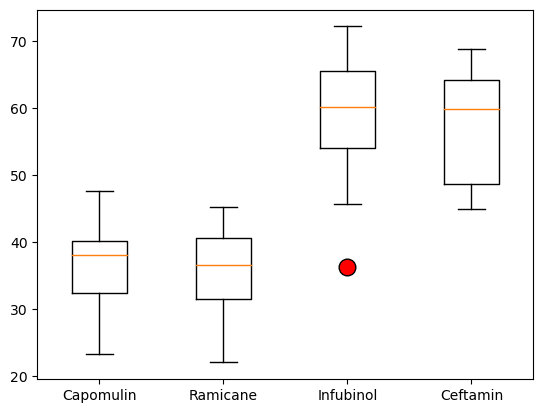

In [26]:
# Put treatmeor loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

#Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    mice_tumor = merged_df.loc[merged_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol.append(mice_tumor)

    # Determine outliers using upper and lower bounds
    quartiles = mice_tumor.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = mice_tumor.loc[(mice_tumor < lower_bound) | (mice_tumor > upper_bound)]
    print(f"Drug: {drug}")
    print(f"the lower bound is {lower_bound} and the upper bound is {upper_bound}")
    print(f"Potential outliers: {outliers}")

flierprops = dict(marker = "o", markerfacecolor = "red", markersize = 12)
plt.boxplot(tumor_vol, labels = treatment_list, flierprops = flierprops)
plt.show()

## Line and Scatter Plots

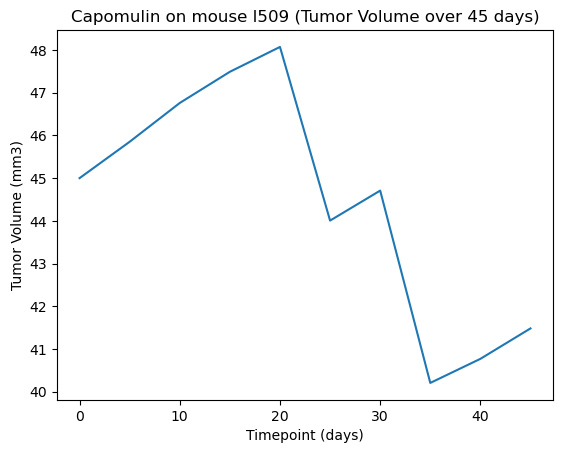

In [54]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509 = mouse_unique_df.loc[(mouse_unique_df["Mouse ID"] == "l509")]
mouse_l509
mouse_l509.plot("Timepoint", "Tumor Volume (mm3)", xlabel = "Timepoint (days)", ylabel = "Tumor Volume (mm3)", 
                legend = False, title = "Capomulin on mouse l509 (Tumor Volume over 45 days)")
plt.show()

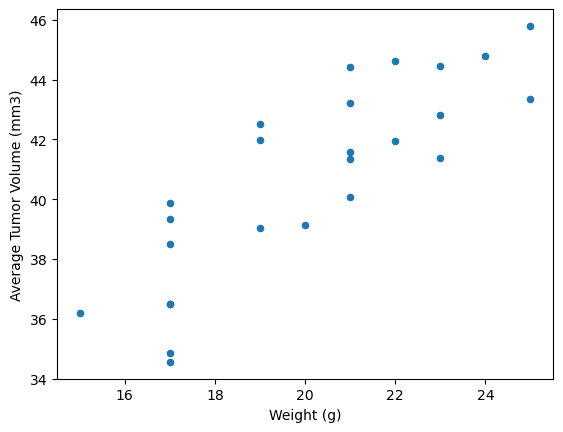

In [157]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_volume = mouse_unique_df.groupby(["Drug Regimen", "Mouse ID"])["Tumor Volume (mm3)"].mean()
Capomulin_avg_df = pd.DataFrame(avg_volume.loc[(avg_volume.index.get_level_values("Drug Regimen") == "Capomulin")])
Capomulin_avg_df                                               
Capomulin_merged = pd.merge(Capomulin_avg_df, mouse_unique_df, on = ["Mouse ID", "Drug Regimen"], how = "left").drop_duplicates(["Mouse ID"])
Capomulin_merged.plot(x = "Weight (g)", y = "Tumor Volume (mm3)_x", kind = "scatter")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.8419363424694721


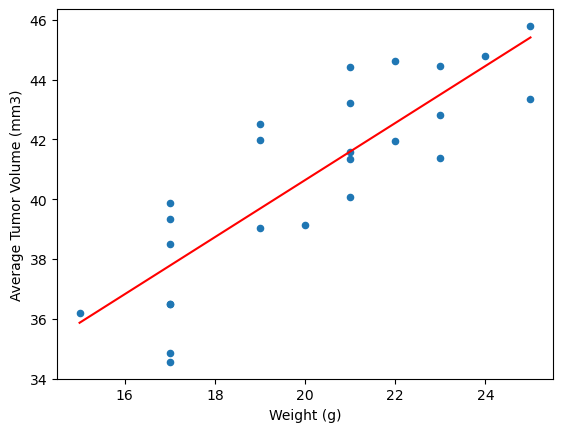

In [116]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, sterr) = st.linregress(Capomulin_merged["Weight (g)"],
                                                             Capomulin_merged["Tumor Volume (mm3)_x"])
#replot scatter
Capomulin_merged.plot(x = "Weight (g)", y = "Tumor Volume (mm3)_x", kind = "scatter")
#plot line
x_values = np.array([Capomulin_merged["Weight (g)"].min(), Capomulin_merged["Weight (g)"].max()])
y_pred = slope * x_values + intercept
plt.plot(x_values, y_pred, 'r-')
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {rvalue}")
     
